# Sprawozdanie z lab 4.

In [1]:
import matplotlib.pyplot as plt
from simanneal import Annealer
import math
import random
import numpy as np

## Task 1

### Drawing tool
Draws list of points with a route

In [575]:
class Drawer:
    
    def __init__(self, points):
        self.points = points
    
    def _connectpoints(x, y, x2, y2):
        plt.plot([x, x2],[y,y2], 'k-')
    
    def _plot_edges(self):
        for i in range(len(self.points) - 1):
            connectpoints(self.points[i].x, self.points[i].y, self.points[i + 1].x, self.points[i + 1].y)
        connectpoints(self.points[0].x, self.points[0].y, self.points[-1].x, self.points[-1].y)

    def draw(self):
        points_repr = list(map(lambda p: [p.x, p.y], self.points))
        plt.plot(*zip(*points_repr), 'ro')

        self._plot_edges()
        plt.show()

### Class point and TSP
Point is just an class representing point. It can calculate the distance to another point.

TSP extends a class from [library](https://github.com/perrygeo/simanneal) I used. `move` method is performed at each step of the annealing and `energy` is calculated to get the energy of the state at each step. These pieces of information are sufficient to perform the algorithm.

I also override `update` method in order to collect data about energy at each point in time.

In [576]:
class Point:
    
    def __init__(self, name, x, y):
        self.name = name
        self.x = x
        self.y = y

    def distance(self, other):
        return math.sqrt(math.pow(x - self.x, 2) + math.pow(y - self.y, 2))
    
    def __repr__(self):
        return self.name# + ' at (' + str(self.x) + ', ' + str(self.y) + ')'
        
class TSP(Annealer):
    
    def __init__(self, init_route, use_consecutive=False):
        self.route = init_route
        self.use_consecutive = use_consecutive
        self.energy_stats = list()
        super(TSP, self).__init__(init_route)
    
    def move(self):
        size = len(self.route)
        if self.use_consecutive:
            a = random.randint(0, size - 1)
            b = (a + 1) % size
        else:
            a = random.randint(0, size - 1)
            b = random.randint(0, size - 1)
        self.route[a], self.route[b] = self.route[b], self.route[a]
        
    def energy(self):
        res = 0
        for i in range(len(self.route) - 1):
            res += self.route[i].distance(self.route[i + 1])
        return res + self.route[0].distance(self.route[-1])
    
    def update(self, step, T, E, acceptance, improvement):
        self.energy_stats.append([step, E])
        self.default_update(step, T, E, acceptance, improvement)
        
    def plot_energy_stats(self):
        plt.plot(*zip(*self.energy_stats), 'ro')
        plt.show()

### Creating test data

In [577]:
def create_cloud(points, size, x_start, x_end, y_start, y_end, suffix):
    for i in range(size):
        x = random.randint(x_start, x_end)
        y = random.randint(y_start, y_end)
        points.append(Point(str(chr(i + 65)) + suffix, x, y))

size = 6    # Amount of points
points = list()
create_cloud(points, size, 0, 25, 0, 25, '_cloud1')
create_cloud(points, size, 75, 100, 0, 25, '_cloud2')
create_cloud(points, size, 0, 25, 75, 100, '_cloud3')
create_cloud(points, size, 75, 100, 75, 100, '_cloud4')

points2 = list()
create_cloud(points2, size, 0, 25, 0, 25, '_cloud1')
create_cloud(points2, size, 75, 100, 0, 25, '_cloud2')
create_cloud(points2, size, 0, 25, 75, 100, '_cloud3')
create_cloud(points2, size, 75, 100, 75, 100, '_cloud4')
create_cloud(points2, size, 150, 175, 0, 25, '_cloud5')
create_cloud(points2, size, 150, 175, 75, 100, '_cloud6')
create_cloud(points2, size, 0, 25, 150, 175, '_cloud7')
create_cloud(points2, size, 75, 100, 150, 175, '_cloud8')
create_cloud(points2, size, 150, 175, 150, 175, '_cloud9')

### Perform simmulated annealing
We use methods from the class we extend. `steps` is the amount of steps the algorithm will perform until returning the result.

We can see that the energy has decreased (even at such low amount of time)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000       1353.34    12.10%     2.20%     0:00:04     0:00:00

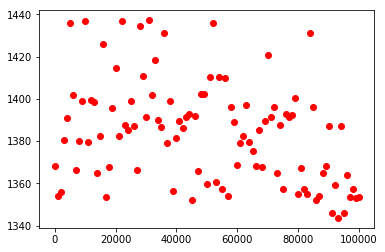

In [578]:
tsp = TSP(points) # use_consecutive can be set on True
                  #  it did not seem to have a big impact
                  #  on the result
tsp.steps = 100000
tsp.copy_strategy = "slice"

route, e = tsp.anneal()
tsp.plot_energy_stats()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000       5496.89     0.00%     0.00%     0:00:07     0:00:00

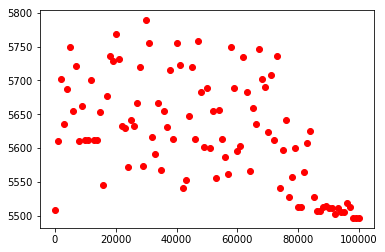

In [579]:
tsp = TSP(points2) # use_consecutive can be set on True
                  #  it did not seem to have a big impact
                  #  on the result
tsp.steps = 100000
tsp.copy_strategy = "slice"

route2, e = tsp.anneal()
tsp.plot_energy_stats()

### Show results

We can see that the routes are almost optimal (could be better if run for a longer time). Komiwojażer never jumps from one lcuster to another and comes back - it always visits all the points in the cluster and then moves on. It hasn't (yet) found the optimal path between clusters due to too little steps of algorithm performed.

[A_cloud1, B_cloud1, C_cloud1, D_cloud1, E_cloud1, F_cloud1, A_cloud2, B_cloud2, C_cloud2, D_cloud2, E_cloud2, F_cloud2, A_cloud3, B_cloud3, C_cloud3, D_cloud3, E_cloud3, F_cloud3, A_cloud4, B_cloud4, C_cloud4, D_cloud4, E_cloud4, F_cloud4]
[A_cloud3, A_cloud1, A_cloud2, D_cloud3, E_cloud1, F_cloud1, E_cloud4, B_cloud2, E_cloud3, C_cloud3, E_cloud2, C_cloud4, D_cloud4, B_cloud4, B_cloud3, C_cloud2, F_cloud2, D_cloud2, F_cloud4, B_cloud1, C_cloud1, D_cloud1, A_cloud4, F_cloud3]


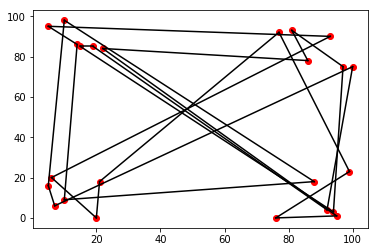

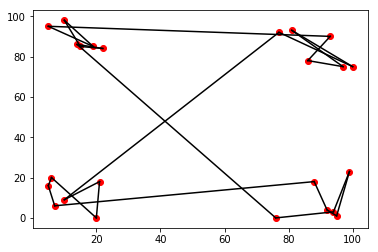

In [580]:
print(route)
print(points)

B = Drawer(points)
A = Drawer(route)
B.draw()
A.draw()

[A_cloud1, B_cloud1, C_cloud1, D_cloud1, E_cloud1, F_cloud1, A_cloud2, B_cloud2, C_cloud2, D_cloud2, E_cloud2, F_cloud2, A_cloud3, B_cloud3, C_cloud3, D_cloud3, E_cloud3, F_cloud3, A_cloud4, B_cloud4, C_cloud4, D_cloud4, E_cloud4, F_cloud4]
[D_cloud9, B_cloud9, C_cloud7, F_cloud3, A_cloud8, B_cloud4, E_cloud6, F_cloud9, F_cloud2, C_cloud8, A_cloud1, C_cloud3, B_cloud1, E_cloud4, A_cloud6, F_cloud7, D_cloud6, B_cloud2, F_cloud4, C_cloud5, C_cloud6, D_cloud1, D_cloud2, C_cloud1, A_cloud3, A_cloud7, D_cloud3, E_cloud1, E_cloud3, D_cloud5, A_cloud5, A_cloud4, F_cloud6, E_cloud5, F_cloud5, A_cloud9, F_cloud1, B_cloud7, D_cloud7, E_cloud9, C_cloud2, A_cloud2, B_cloud3, B_cloud6, C_cloud4, F_cloud8, D_cloud8, B_cloud5, E_cloud7, E_cloud8, D_cloud4, B_cloud8, E_cloud2, C_cloud9]


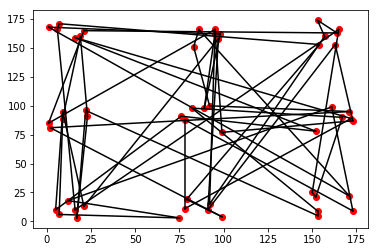

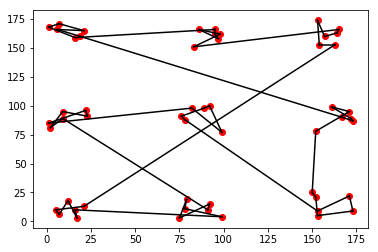

In [581]:
print(route)
print(points2)

B = Drawer(points2)
A = Drawer(route2)
B.draw()
A.draw()

## Task 2

First we create a binary image. In order to show the reppeling forces we create a box in the left upper corner of busy fields.

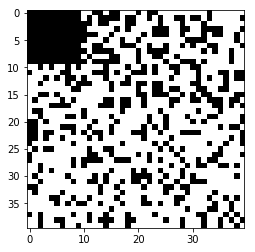

In [11]:
def populate(array, density, fill_box=False):
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            if i < 10 and j < 10 and fill_box:
                array[i][j] = True
            if random.uniform(0.0, 1.0) < density:
                array[i][j] = True

def plot(image, name):
    plt.imshow(img, cmap='Greys')
    plt.savefig(name, bbox_inches='tight')
    plt.show()

n = 40
d = 0.3
img = np.zeros((n, n), dtype=bool)
populate(img, d, True)
plot(img, 'start.png')

In [12]:
class BinaryImg(Annealer):
    
    def __init__(self, init_bitmap, energy_strategy='4neigh', move_strategy='slow'):
        self.x_last = init_bitmap.shape[0] - 1
        self.y_last = init_bitmap.shape[1] - 1
        self.bitmap = init_bitmap
        self.energy_strategy = energy_strategy
        self.move_strategy = move_strategy
        self.energy_stats = list()
        super(BinaryImg, self).__init__(init_bitmap)
        
    def plot_energy_stats(self, save=True):
        plt.plot(*zip(*self.energy_stats), 'ro')
        if save:
            plt.savefig('energy_stats.png')
        plt.show()
    
    ## Move stuff here
    
    def move(self):
        if self.move_strategy == 'rows':
            self._move_rows()
        else:
            self._move_all()

    
    def _move_all(self):
        for i in range(self.bitmap.shape[0]):
            for j in range(self.bitmap.shape[1]):
                if self.bitmap[i][j]:
                    x_dir = random.choice([-1, 0, 1])
                    y_dir = random.choice([-1, 0, 1])
                    self._try_move(i, j, x_dir, y_dir)
    
    def _move_rows(self):
        if random.uniform(0.0, 1.0) < 0.5:
            a = random.randint(0, self.x_last)
            b = random.randint(0, self.x_last)
            self.bitmap[:,[a, b]] = self.bitmap[:,[b, a]]
        else:
            a = random.randint(0, self.y_last)
            b = random.randint(0, self.y_last)
            self.bitmap[[a, b]] = self.bitmap[[b, a]]
    
    # x, y make direction vector
    def _try_move(self, i, j, x, y):
        if i + x >= 0 and i + x <= self.x_last and j + y >= 0 and j + y <= self.y_last and not self.bitmap[i + x][j + y]:
            self.bitmap[i][j] = False
            self.bitmap[i + x][j + y] = True
            return True
        return False
    
    ## Energy stuff here
    
    def energy(self):
        res = 0
        for i in range(self.bitmap.shape[0]):
            for j in range(self.bitmap.shape[1]):
                res += self._neighbourhood_energy(i, j)
        return res
    
    
    def _neighbourhood_energy(self, i, j):
        if self.energy_strategy == '4neigh':
            return self._4neigh_energy(i, j)
        if self.energy_strategy == '8neigh':
            return self._8neigh_energy(i, j)
        if self.energy_strategy == 'pull_push':
            return _pull_push_energy(i, j)
        return res
    
    def _4neigh_energy(self, i, j):
        res = 0
        if i != 0:
            res += self.bitmap[i-1][j]
        if i != self.x_last:
            res += self.bitmap[i+1][j]
        if j != 0:
            res += self.bitmap[i][j-1]
        if j != self.y_last:
            res += self.bitmap[i][j+1]
        return res
    
    def _8neigh_energy(self, i, j):
        res = self._4neigh_energy(i, j)
        if i != 0:
            if j != 0:
                res += self.bitmap[i-1][j-1]
            if j != self.y_last:
                res += self.bitmap[i-1][j+1]
        if i != self.x_last:
            if j != 0:
                res += self.bitmap[i-1][j-1]
            if j != self.y_last:
                res += self.bitmap[i-1][j+1]
        return res

    
    def update(self, step, T, E, acceptance, improvement):
        self.energy_stats.append([step, E])
        self.default_update(step, T, E, acceptance, improvement)
            

Here, in this notebook we will test the strategy of 8 neighbours and move strategy of swapping rows/columns. Let's take 1000 steps

In [13]:
tsp = BinaryImg(img, '8neigh', 'rows')
tsp.steps = 25000
tsp.copy_strategy = "slice"

res_img, e = tsp.anneal()

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000       4256.00     0.00%     0.00%     0:09:06     0:00:00

On this simple simulation we can see that fields that made up the black box in the left corner got pulled apart. That's because we used the repelling strategy (energy is less when there's no neighbours around.

The energy is going down along the process but for such a short period it's not a very much of a decrease.

For bigger input data look at the folders in repo. It uses the script that is enriched with mechanisms to save the plots, input arguments and to categorize them

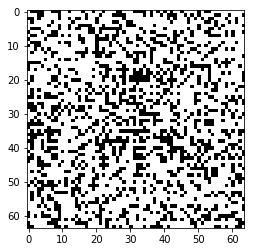

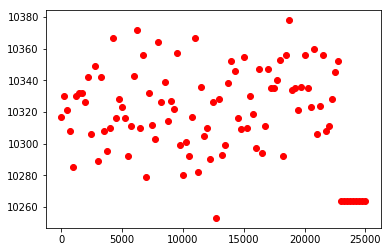

In [83]:
plot(img, 'result.png')
tsp.plot_energy_stats()

## Task 3

In [76]:
arr = np.genfromtxt("example_sudoku.csv", delimiter="|")
nans = []
for i in range(arr.shape[0]):
    for j in range(arr.shape[0]):
        if math.isnan(arr[i][j]):
            nans.append((i, j))
            
arr = arr.astype(int)

for i, j in nans:
    arr[i][j] = 0
print(arr)

[[0 0 0 1 0 5 0 6 8]
 [0 0 0 0 0 0 7 0 1]
 [9 0 1 0 0 0 0 3 0]
 [0 0 7 0 2 6 0 0 0]
 [5 0 0 0 0 0 0 0 3]
 [0 0 0 8 7 0 4 0 0]
 [0 3 0 0 0 0 8 0 5]
 [1 0 5 0 0 0 0 0 0]
 [7 9 0 4 0 1 0 0 0]]
[(0, 0), (0, 1), (0, 2), (0, 4), (0, 6), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 7), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 8), (3, 0), (3, 1), (3, 3), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 5), (5, 7), (5, 8), (6, 0), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (7, 1), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 2), (8, 4), (8, 6), (8, 7), (8, 8)]


In [77]:
from collections import Counter
import functools

def rest(vals):
    return [x for x in range(1, 10) if x not in vals]

class SudokuSolver(Annealer):
    
    def __init__(self, init_board, nans):
        self.size = 9
        self.nans = nans
        self.state = init_board
        self._fill_up()
        print(self.state)
        super(SudokuSolver, self).__init__(init_board)
    
    def _fill_up(self):
        for i in range(3):
            for j in range(3):
                tmp = self._get_3x3(i, j)
                vals = rest(tmp.flatten())
                counter = 0
                for a in range(3):
                    for b in range(3):
                        if tmp[a][b] == 0:
                            tmp[a][b] = vals[counter]
                            counter += 1

    def move(self):
        self._change_2_rand_points()
        
    def _change_2_rand_points(self):
        i = random.randint(0, 2)
        j = random.randint(0, 2)
        a = random.randint(0, 2)
        b = random.randint(0, 2)
        c = random.randint(0, 2)
        d = random.randint(0, 2)
        while (i*3 + a, j*3 + b) not in self.nans:
            if random.uniform(0.0, 1.0) < 0.5:
                a += 1
                a %= 3
            else:
                b += 1
                b %= 3
        while (i*3 + c, j*3 + d) not in self.nans:
            if random.uniform(0.0, 1.0) < 0.5:
                c += 1
                c %= 3
            else:
                d += 1
                d %= 3
        self.state[i*3 + c][j*3 + d], self.state[i*3 + a][j*3 + b] = self.state[i*3 + a][j*3 + b], self.state[i*3 + c][j*3 + d]
                
        
    def energy(self):
        return self._repetitions_in_rows_cols(self.state)
    
    def _repetitions_in_rows_cols(self, sq):
        res = 0
        for i in range(self.size):
            res += functools.reduce(lambda a, acc: a + acc, list(map(lambda a: a[1] - 1 if a[1] > 1 else 0, Counter(sq[i]).items())))
            res += functools.reduce(lambda a, acc: a + acc, list(map(lambda a: a[1] - 1 if a[1] > 1 else 0, Counter(sq[:,i]).items())))
        return res
    
    def _get_3x3(self, i, j):
        return self.state[i*3:(i+1)*3,j*3:(j+1)*3]

In [81]:
tsp = SudokuSolver(arr, nans)
tsp.steps = 100000
# tsp.copy_strategy = "slice"
tsp.Tmax = 0.5
tsp.Tmin = 0.4

res, e = tsp.anneal()
print(res, e)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining


[[2 3 4 1 2 5 2 6 8]
 [5 6 7 3 4 6 7 4 1]
 [9 8 1 7 8 9 5 3 9]
 [1 2 7 1 2 6 1 2 5]
 [5 3 4 3 4 5 6 7 3]
 [6 8 9 8 7 9 4 8 9]
 [2 3 4 2 3 5 8 1 5]
 [1 6 5 6 7 8 2 3 4]
 [7 9 8 4 9 1 6 7 9]]


     0.40000         11.00    20.40%     0.10%     0:00:21     0:00:00

[[4 7 3 1 9 5 2 6 8]
 [8 5 6 3 4 2 7 9 1]
 [9 2 1 6 8 7 5 3 4]
 [3 4 7 5 2 6 1 8 9]
 [5 8 2 9 1 4 6 7 3]
 [6 1 9 8 7 3 4 5 2]
 [2 3 4 7 6 9 8 1 5]
 [1 6 5 2 3 8 9 4 7]
 [7 9 8 4 5 1 3 2 6]] 0


And we've got a solved sudoku puzzle!!!